<a href="https://colab.research.google.com/github/Luciesprogram/Gen-AI/blob/main/Gemini_API_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The python SDK for the Gemini API

In [1]:
! pip install -q -U google-generativeai

## **Import Packages**

In [2]:
import google.generativeai as genai
import pathlib
from IPython.display import display, Markdown
import textwrap

/usr/local/lib/python3.12/dist-packages/google/colab/_import_hooks/_hook_injector.py:55: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  loader.exec_module(module)


In [3]:
from google.colab import userdata

In [4]:
gemini_api_key = userdata.get('GEMINI')

In [5]:
genai.configure(api_key=gemini_api_key)

In [6]:
for models in genai.list_models():
  print(models)

Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representation of a text.',
      input_token_limit=1024,
      output_token_limit=1,
      supported_generation_methods=['embedText', 'countTextTokens'],
      temperature=None,
      max_temperature=None,
      top_p=None,
      top_k=None)
Model(name='models/gemini-2.5-flash',
      base_model_id='',
      version='001',
      display_name='Gemini 2.5 Flash',
      description=('Stable version of Gemini 2.5 Flash, our mid-size multimodal model that '
                   'supports up to 1 million tokens, released in June of 2025.'),
      input_token_limit=1048576,
      output_token_limit=65536,
      supported_generation_methods=['generateContent',
                                    'countTokens',
                                    'createCachedContent',
                                    'batchGenerateContent'],
     

In [7]:
for models in genai.list_models():
  if 'generateContent' in models.supported_generation_methods:
    print(models.name)

models/gemini-2.5-flash
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-exp-1206
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
models/gemma-3n-e2b-it
models/gemini-flash-latest
models/gemini-flash-lite-latest
models/gemini-pro-latest
models/gemini-2.5-flash-lite
models/gemini-2.5-flash-image
models/gemini-2.5-flash-preview-09-2025
models/gemini-2.5-flash-lite-preview-09-2025
models/gemini-3-pro-preview
models/gemini-3-flash-preview
models/gemini-3-pro-image-preview
models/nano-banana-pro-preview
models/gemini-robotics-er-1.5-preview
models/gemini-2.5-computer-use-preview-10-2025
models/deep-research-pro-p

In [6]:
model = genai.GenerativeModel(model_name='gemini-2.5-flash')

In [7]:
def to_markdown(text):
  text = text.replace("#","")
  return Markdown(textwrap.indent(text,'>',predicate=lambda _:True))

In [8]:
to_markdown("This is a . sample with bullet points")

>This is a . sample with bullet points

In [9]:
%%time
response = model.generate_content("what is today's date.")

CPU times: user 33.1 ms, sys: 5.18 ms, total: 38.3 ms
Wall time: 3.38 s


In [12]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "**Generative AI** is a type of artificial intelligence that can **create new and original content** rather than just analyzing, classifying, or predicting based on existing data.\n\nThink of it this way:\n\n*   **Discriminative AI** (like the AI that flags spam emails or recognizes faces) is good at *identifying* or *classifying* things based on what it has learned. It tells you \"what something is.\"\n*   **Generative AI** goes a step further. It doesn't just recognize a cat; it can *draw* a new, never-before-seen cat in a specific style, or *write a story* about a cat, or *compose a song* inspired by cats. It \"makes something new.\"\n\n### How Generative AI Works (Simplified)\n\n1.  **Massive Training Data:** Generative AI models are trained on enormous d

In [10]:
to_markdown(response.text)

>I do not have a concept of "today" as I am an AI and do not experience time. To find today's date, please check your device's clock or a reliable online source.

In [14]:
response.parts

[text: "**Generative AI** is a type of artificial intelligence that can **create new and original content** rather than just analyzing, classifying, or predicting based on existing data.\n\nThink of it this way:\n\n*   **Discriminative AI** (like the AI that flags spam emails or recognizes faces) is good at *identifying* or *classifying* things based on what it has learned. It tells you \"what something is.\"\n*   **Generative AI** goes a step further. It doesn\'t just recognize a cat; it can *draw* a new, never-before-seen cat in a specific style, or *write a story* about a cat, or *compose a song* inspired by cats. It \"makes something new.\"\n\n### How Generative AI Works (Simplified)\n\n1.  **Massive Training Data:** Generative AI models are trained on enormous datasets of existing content – images, text, audio, code, etc. For example, a text-generating AI might read billions of web pages, books, and articles.\n2.  **Learning Patterns & Structures:** During training, the AI doesn\'

In [15]:
%%time
for chunk in response:
  print(chunk.text)
  print("__"*80)

**Generative AI** is a type of artificial intelligence that can **create new and original content** rather than just analyzing, classifying, or predicting based on existing data.

Think of it this way:

*   **Discriminative AI** (like the AI that flags spam emails or recognizes faces) is good at *identifying* or *classifying* things based on what it has learned. It tells you "what something is."
*   **Generative AI** goes a step further. It doesn't just recognize a cat; it can *draw* a new, never-before-seen cat in a specific style, or *write a story* about a cat, or *compose a song* inspired by cats. It "makes something new."

### How Generative AI Works (Simplified)

1.  **Massive Training Data:** Generative AI models are trained on enormous datasets of existing content – images, text, audio, code, etc. For example, a text-generating AI might read billions of web pages, books, and articles.
2.  **Learning Patterns & Structures:** During training, the AI doesn't just memorize the data

In [9]:
!curl -o img1.jpg https://www.shutterstock.com/image-illustration/rainbow-colored-umbrella-stand-out-260nw-2662257993.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23468  100 23468    0     0   107k      0 --:--:-- --:--:-- --:--:--  107k


In [10]:
img1 = "https://img.freepik.com/free-photo/woman-beach-with-her-baby-enjoying-sunset_52683-144131.jpg?size=626&ext=jpg"

In [11]:
import requests

In [12]:
from PIL import Image

In [13]:
def get_image(url,filename,extension):
  content = requests.get(url).content
  with open(f'/content/{filename}.{extension}','wb') as f:
    f.write(content)
  image = Image.open(f"/content/{filename}.{extension}")
  image.show()
  return image

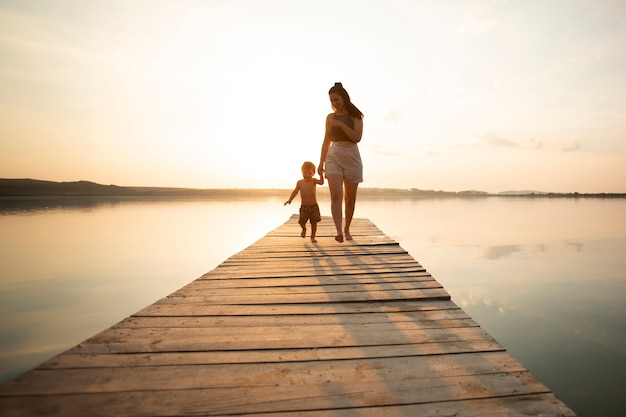

In [14]:
get_image(img1,"image1","jpg")

In [15]:
%%time
response1 = model.generate_content(["Describe about the uploaded image.",
 {"mime_type": "image/jpeg", "data": open("/content/image1.jpg", "rb").read()}])

CPU times: user 93.8 ms, sys: 13 ms, total: 107 ms
Wall time: 14.3 s


In [16]:
to_markdown(response1.text)

>The image captures a serene and idyllic moment as a woman and a small child walk hand-in-hand along a rustic wooden pier. The scene is bathed in the soft, warm glow of either sunrise or sunset, often referred to as the 'golden hour', casting a gentle, ethereal light across the entire landscape.
>
>In the foreground, a sturdy wooden pier extends from the bottom of the frame, leading the eye towards the figures and further into the tranquil water. The planks of the pier show signs of wear and age, adding to the natural, unadorned beauty of the setting. Long, soft shadows stretch out behind the woman and child on the pier, indicating the low angle of the sun, which appears to be positioned just outside the frame to the right.
>
>The two central figures are a woman and a young child. The woman, on the right side of the pier, is dressed in a light-colored top and shorts, her hair pulled up. She is looking down towards the child with a gentle expression. The child, a young boy, walks on the left side of the pier, seemingly bare-chested and wearing shorts. He appears to be taking eager steps forward, slightly ahead of the woman, as they hold hands. Their interaction conveys a sense of loving connection and shared joy.
>
>The background features a vast, calm body of water, likely a lake or a large river, which perfectly reflects the warm, golden hues of the sky. The water is exceptionally still, almost mirror-like, blurring the distinction between water and sky at the horizon. In the far distance, a subtle, hazy outline of land or low hills can be seen, adding depth without distracting from the central figures.
>
>The overall color palette is dominated by warm tones – soft yellows, oranges, and muted browns – creating a harmonious and peaceful atmosphere. The natural light highlights the textures of the wood and the gentle ripples (or lack thereof) in the water, contributing to the tranquil and dreamlike quality of the image. It evokes a feeling of warmth, connection, and peaceful enjoyment of nature.

In [18]:
%%time

response2 = model.generate_content("tell me the story of doraemon.",
    generation_config = genai.types.GenerationConfig(
        candidate_count=2,
        stop_sequences=['stop'],
        max_output_tokens= 1000,
        temperature=1
    )
)

CPU times: user 62.6 ms, sys: 10.2 ms, total: 72.8 ms
Wall time: 9.91 s


In [25]:
response2

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Doraemon is one of the most beloved and enduring manga and anime series of all time, created by Fujiko F. Fujio (a pen name for the duo Hiroshi Fujimoto and"
              },
              {
                "text": "The story of Doraemon centers around a hapless young boy named **Nobita Nobi** and his robotic cat friend from the future, **Doraemon**.\n\nHere's the full tale"
              }
            ],
            "role": "model"
          },
          "finish_reason": "MAX_TOKENS",
          "index": 0
        },
        {
          "content": {
            "parts": [
              {
                "text": "The story of Doraemon centers around a hapless young boy named **Nobita Nobi** and his robotic cat friend from the future, **Doraemon**.\n\nHere's t

In [29]:
response1

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "The image captures a serene and idyllic moment as a woman and a small child walk hand-in-hand along a rustic wooden pier. The scene is bathed in the soft, warm glow of either sunrise or sunset, often referred to as the 'golden hour', casting a gentle, ethereal light across the entire landscape.\n\nIn the foreground, a sturdy wooden pier extends from the bottom of the frame, leading the eye towards the figures and further into the tranquil water. The planks of the pier show signs of wear and age, adding to the natural, unadorned beauty of the setting. Long, soft shadows stretch out behind the woman and child on the pier, indicating the low angle of the sun, which appears to be positioned just outside the frame to the right.\n\nThe two central figures are a wo

In [28]:
response1.text

"The image captures a serene and idyllic moment as a woman and a small child walk hand-in-hand along a rustic wooden pier. The scene is bathed in the soft, warm glow of either sunrise or sunset, often referred to as the 'golden hour', casting a gentle, ethereal light across the entire landscape.\n\nIn the foreground, a sturdy wooden pier extends from the bottom of the frame, leading the eye towards the figures and further into the tranquil water. The planks of the pier show signs of wear and age, adding to the natural, unadorned beauty of the setting. Long, soft shadows stretch out behind the woman and child on the pier, indicating the low angle of the sun, which appears to be positioned just outside the frame to the right.\n\nThe two central figures are a woman and a young child. The woman, on the right side of the pier, is dressed in a light-colored top and shorts, her hair pulled up. She is looking down towards the child with a gentle expression. The child, a young boy, walks on the

In [43]:
%%time

response3 = model.generate_content("tell me the story of doraemon.",
    generation_config = genai.types.GenerationConfig(
        candidate_count=1,
        stop_sequences=['stop'],
        temperature=1
    )
)

CPU times: user 165 ms, sys: 14.4 ms, total: 179 ms
Wall time: 25.9 s


In [44]:
to_markdown(response3.text)

>Doraemon is one of the most beloved and iconic characters in Japanese manga and anime. His story is a heartwarming, humorous, and sometimes poignant tale of friendship, growth, and the everyday struggles of a young boy.
>
>Here's the story of Doraemon:
>
> The Origin: A Robot from the Future
>
>Our story begins in the **22nd century**, where Doraemon is a mass-produced, somewhat faulty, nanny robot cat.
>
>*   **Birth & Early Life:** He was originally a bright yellow robot, fresh off the assembly line. However, during his creation, a mistake occurred, leaving him with an odd voice and some minor programming glitches.
>*   **The Mouse Incident:** His iconic blue color and lack of ears come from a traumatic incident. While taking a nap, two robotic mice nibbled off his ears! He was so distraught that he tried to drink a "sadness potion" (or robot tears, depending on the version), but accidentally drank a "sadness formula" which stripped away his yellow paint, leaving him permanently blue. The incident also instilled in him a lifelong, crippling fear of mice.
>*   **Failed Nanny:** Doraemon was initially assigned to an aristocratic family, but he proved to be an inept nanny. Eventually, he was sent to live with the **Nobi family**.
>
> The Mission: Saving Nobita's Future
>
>The reason Doraemon is sent back in time is to help **Nobita Nobi**, a young boy who lives in Tokyo during the **20th century**.
>
>*   **Sewashi Nobi:** Doraemon is sent by **Sewashi Nobi**, Nobita's great-great-grandson. Sewashi explains that Nobita's failures in life – his laziness, poor grades, bad luck, and constant missteps – are leading to a future where his descendants (including Sewashi) are plagued by immense financial debt.
>*   **The Goal:** Doraemon's mission is to guide Nobita, improve his life, and set him on a better path, thereby ensuring a more prosperous future for the entire Nobi lineage. To do this, Doraemon is equipped with his most famous asset: the **4D pocket**.
>
> Nobita's World: A Boy in Need
>
>**Nobita Nobi** is the human protagonist and the heart of the story. He's an average 10-year-old boy, but with a laundry list of shortcomings:
>
>*   **Lazy & Unmotivated:** He loves napping, reading comics, and playing but hates homework and studying.
>*   **Poor Student:** He consistently gets zero marks on tests and is often scolded by his teacher and mother.
>*   **Clumsy & Unathletic:** He's terrible at sports, frequently trips, and can't even ride a unicycle.
>*   **Bullied:** He's the frequent target of **Gian** (Takeshi Goda), the local bully, and **Suneo Honekawa**, the rich and cunning show-off.
>*   **Crybaby:** He often runs home crying whenever things go wrong.
>*   **Good-Hearted:** Despite his flaws, Nobita possesses a kind heart, often shows compassion, and genuinely cares for his friends, especially **Shizuka Minamoto**, his crush.
>
> The Everyday Adventures: Gadgets and Lessons
>
>The typical plot of a Doraemon story revolves around Nobita's daily life:
>
>1.  **The Problem:** Nobita faces a predicament: he's bullied, needs to study, wants to impress Shizuka, or simply has a whimsical desire (like wanting to fly or visit another planet).
>2.  **The Plea:** He runs home, crying and complaining to Doraemon, begging for a gadget to solve his problem.
>3.  **Doraemon's Reluctance:** Doraemon often sighs, scolds Nobita for his laziness or selfishness, and initially refuses.
>4.  **The Gadget:** However, Doraemon eventually gives in and pulls out one of his fantastic futuristic gadgets from his **4D pocket** (which is much bigger on the inside than it appears). These gadgets range from the practical (Anywhere Door, Take-copter) to the absurd (Memory Bread, Gulliver Tunnel, Time Kerchief).
>5.  **Nobita's Misuse:** Nobita, being Nobita, almost always misuses the gadget for selfish reasons, gets carried away, or creates a bigger mess than he started with.
>6.  **The Chaos & Resolution:** The situation spirals out of control, leading to hilarious complications, often involving Gian, Suneo, and Shizuka. Eventually, Doraemon has to step in to fix the chaos, or Nobita learns a hard lesson through the consequences of his actions.
>
> The Supporting Cast
>
>*   **Shizuka Minamoto:** Nobita's kind, intelligent, and pretty classmate and love interest. She loves baths, playing the piano, and reading.
>*   **Gian (Takeshi Goda):** The strong, boisterous, and sometimes aggressive bully of the neighborhood. He loves to sing (terribly!) and forces his friends to listen to his "recitals." Despite his bullying, he has a strong sense of loyalty to his friends and family and can be surprisingly good-hearted.
>*   **Suneo Honekawa:** The rich, spoiled, and cunning friend of Gian. He loves to show off his expensive toys, travels, and possessions, often making Nobita feel inferior. He often follows Gian but also tries to manipulate situations to his own advantage.
>*   **Dorami:** Doraemon's intelligent, responsible, and caring younger sister. She's often more practical and helpful than Doraemon, sometimes stepping in to assist Nobita when Doraemon is unavailable or overwhelmed.
>
> The Underlying Message
>
>Beyond the slapstick comedy and fantastical gadgets, Doraemon teaches several important lessons:
>
>*   **Friendship:** The unbreakable bond between Doraemon and Nobita, despite their frustrations with each other.
>*   **Consequences:** The importance of understanding that actions have consequences, especially when taking shortcuts.
>*   **Hard Work:** The value of putting in effort rather than relying on quick fixes.
>*   **Imagination:** The endless possibilities that stem from creative thinking.
>*   **Acceptance:** Doraemon accepts Nobita for who he is, while gently pushing him to be better.
>
> The Enduring Legacy
>
>Doraemon continues to be a cultural phenomenon. While there isn't one definitive "ending" to the continuous TV series, the manga does eventually show Nobita growing up, marrying Shizuka, and becoming a more responsible adult, indicating that Doraemon's mission was ultimately successful. The story is a timeless celebration of childhood, friendship, and the journey of learning to navigate the world, one futuristic gadget mishap at a time.

## **Chat Conversion**

In [46]:
chat = model.start_chat(history=[])

In [47]:
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-2.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [48]:
response4 = chat.send_message("tell me about the last episode of a doraemon according to the manga comic book.")

In [49]:
to_markdown(response4.text)

>This is a great question, as it touches upon a common misconception and a couple of truly iconic stories within the Doraemon universe!
>
>**The short answer is: There isn't a single, definitive "last episode" of Doraemon in the manga that concludes the entire series.**
>
>Here's why, and what stories are often mistaken for the "final" ending:
>
>1.  **The Nature of Doraemon's Manga:**
>    *   Doraemon was primarily an episodic series. Each chapter was mostly self-contained, with Nobita facing a problem, Doraemon providing a gadget, and the situation often going hilariously wrong.
>    *   The series ran from 1969 until the passing of its co-creator, Fujiko F. Fujio, in 1996. There was no grand, overarching narrative meant to build to a final conclusion for Nobita's life. It simply continued with new adventures.
>
>2.  **The Most Famous "Temporary" Ending: "Goodbye, Doraemon" (さようなら、ドラえもん - Sayōnara, Doraemon)**
>    *   This chapter was published in **March 1974**.
>    *   **Plot:** Doraemon receives a message from the future that he must return. He is worried about Nobita, who he believes can't fend for himself. Nobita, overhearing this, is determined to prove his independence. He gets into a fight with Gian, and despite being beaten repeatedly, he refuses to give up, wanting to show Doraemon that he will be okay. Seeing Nobita's newfound courage and determination, Doraemon tearfully but proudly leaves, knowing his mission is accomplished.
>    *   **Context:** This was an attempt by Fujiko F. Fujio to temporarily end the series, perhaps to explore other projects. However, the outpouring of sadness and demand from readers was so immense that they quickly brought Doraemon back.
>
>3.  **The "Return" Chapter: "The Day Doraemon Returns" (帰ってきたドラえもん - Kaette Kita Doraemon)**
>    *   Published just one month later in **April 1974**.
>    *   **Plot:** Nobita is heartbroken and lonely without Doraemon. Gian and Suneo trick him with a fake Doraemon. Feeling desperate, Nobita remembers a gadget Doraemon left behind called the "Lie-Telling Machine" (ウソ800 - Uso Hapyaku, lit. "Lie 800"). When you say something into it, the opposite becomes true. Nobita sadly says, "Doraemon will never return again." Since this is a "lie," the opposite happens, and Doraemon suddenly reappears, much to Nobita's joy.
>    *   **Context:** This chapter perfectly resolved the previous "ending" and allowed the series to continue its long run. Together, these two chapters are often cited as the closest the manga ever came to a resolved "ending" arc.
>
>4.  **The Famous Fan-Made Ending (NOT CANONICAL!):**
>    *   It's important to mention a very popular, heartwarming, but **unofficial and fan-made doujinshi (fan comic)** that circulated widely online.
>    *   **Plot:** In this fan story, Doraemon runs out of battery, and there's no way to recharge him without erasing his memories. Nobita dedicates his life to studying robotics and eventually becomes a brilliant scientist, inventing the very technology that allows him to revive Doraemon without memory loss. It's often embellished with a twist that Nobita was actually in a coma, or that he himself invented Doraemon in the future.
>    *   **Why it's important to distinguish:** While incredibly creative and emotionally resonant, this story was *never* part of the official manga by Fujiko F. Fujio. It was a well-crafted fan work that many people mistakenly believe is the true ending.
>
>**In summary:**
>
>The "last episode" feeling you might recall from the manga would most accurately refer to the **"Goodbye, Doraemon" / "The Day Doraemon Returns"** arc from 1974. This was a powerful, emotional arc that served as a temporary conclusion before the series resumed. The manga officially continued until the creator's passing without a final, grand concluding chapter for Nobita's entire life story.

In [50]:
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-2.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[protos.Content({'parts': [{'text': 'tell me abou...a comic book.'}], 'role': 'user'}), protos.Content({'parts': [{'text': 'This is a gr...e life story.'}], 'role': 'model'})]
)

In [101]:
chat.history

[parts {
   text: "tell me about the last episode of a doraemon according to the manga comic book."
 }
 role: "user",
 parts {
   text: "This is a great question, as it touches upon a common misconception and a couple of truly iconic stories within the Doraemon universe!\n\n**The short answer is: There isn\'t a single, definitive \"last episode\" of Doraemon in the manga that concludes the entire series.**\n\nHere\'s why, and what stories are often mistaken for the \"final\" ending:\n\n1.  **The Nature of Doraemon\'s Manga:**\n    *   Doraemon was primarily an episodic series. Each chapter was mostly self-contained, with Nobita facing a problem, Doraemon providing a gadget, and the situation often going hilariously wrong.\n    *   The series ran from 1969 until the passing of its co-creator, Fujiko F. Fujio, in 1996. There was no grand, overarching narrative meant to build to a final conclusion for Nobita\'s life. It simply continued with new adventures.\n\n2.  **The Most Famous \"Temp

In [99]:
response2.candidates[1].content.parts[0].text

"The story of Doraemon centers around a hapless young boy named **Nobita Nobi** and his robotic cat friend from the future, **Doraemon**.\n\nHere's the full tale"

In [100]:
for chats in chat.history:
  display(to_markdown(f"**{chats.role}**: {chats.parts[0].text}"))

>**user**: tell me about the last episode of a doraemon according to the manga comic book.

>**model**: This is a great question, as it touches upon a common misconception and a couple of truly iconic stories within the Doraemon universe!
>
>**The short answer is: There isn't a single, definitive "last episode" of Doraemon in the manga that concludes the entire series.**
>
>Here's why, and what stories are often mistaken for the "final" ending:
>
>1.  **The Nature of Doraemon's Manga:**
>    *   Doraemon was primarily an episodic series. Each chapter was mostly self-contained, with Nobita facing a problem, Doraemon providing a gadget, and the situation often going hilariously wrong.
>    *   The series ran from 1969 until the passing of its co-creator, Fujiko F. Fujio, in 1996. There was no grand, overarching narrative meant to build to a final conclusion for Nobita's life. It simply continued with new adventures.
>
>2.  **The Most Famous "Temporary" Ending: "Goodbye, Doraemon" (さようなら、ドラえもん - Sayōnara, Doraemon)**
>    *   This chapter was published in **March 1974**.
>    *   **Plot:** Doraemon receives a message from the future that he must return. He is worried about Nobita, who he believes can't fend for himself. Nobita, overhearing this, is determined to prove his independence. He gets into a fight with Gian, and despite being beaten repeatedly, he refuses to give up, wanting to show Doraemon that he will be okay. Seeing Nobita's newfound courage and determination, Doraemon tearfully but proudly leaves, knowing his mission is accomplished.
>    *   **Context:** This was an attempt by Fujiko F. Fujio to temporarily end the series, perhaps to explore other projects. However, the outpouring of sadness and demand from readers was so immense that they quickly brought Doraemon back.
>
>3.  **The "Return" Chapter: "The Day Doraemon Returns" (帰ってきたドラえもん - Kaette Kita Doraemon)**
>    *   Published just one month later in **April 1974**.
>    *   **Plot:** Nobita is heartbroken and lonely without Doraemon. Gian and Suneo trick him with a fake Doraemon. Feeling desperate, Nobita remembers a gadget Doraemon left behind called the "Lie-Telling Machine" (ウソ800 - Uso Hapyaku, lit. "Lie 800"). When you say something into it, the opposite becomes true. Nobita sadly says, "Doraemon will never return again." Since this is a "lie," the opposite happens, and Doraemon suddenly reappears, much to Nobita's joy.
>    *   **Context:** This chapter perfectly resolved the previous "ending" and allowed the series to continue its long run. Together, these two chapters are often cited as the closest the manga ever came to a resolved "ending" arc.
>
>4.  **The Famous Fan-Made Ending (NOT CANONICAL!):**
>    *   It's important to mention a very popular, heartwarming, but **unofficial and fan-made doujinshi (fan comic)** that circulated widely online.
>    *   **Plot:** In this fan story, Doraemon runs out of battery, and there's no way to recharge him without erasing his memories. Nobita dedicates his life to studying robotics and eventually becomes a brilliant scientist, inventing the very technology that allows him to revive Doraemon without memory loss. It's often embellished with a twist that Nobita was actually in a coma, or that he himself invented Doraemon in the future.
>    *   **Why it's important to distinguish:** While incredibly creative and emotionally resonant, this story was *never* part of the official manga by Fujiko F. Fujio. It was a well-crafted fan work that many people mistakenly believe is the true ending.
>
>**In summary:**
>
>The "last episode" feeling you might recall from the manga would most accurately refer to the **"Goodbye, Doraemon" / "The Day Doraemon Returns"** arc from 1974. This was a powerful, emotional arc that served as a temporary conclusion before the series resumed. The manga officially continued until the creator's passing without a final, grand concluding chapter for Nobita's entire life story.

## **Count Tokens**

In [102]:
model.count_tokens("Tell me the full story of doraemon.")

total_tokens: 8

## **Use Embeddings**

In [104]:
result = genai.embed_content(
    model = 'gemini-embedding-001',
    content = "What is meaning of life.",
    task_type = "RETRIEVAL_DOCUMENT",
    title = "Embedding of a single string"
)

In [108]:
len(result['embedding'])

3072

In [123]:
for i in result['embedding']:
  print(i)
  print(len(i))

[-0.022374554, -0.004560777, 0.013309286, -0.0545072, -0.02090443, 0.012355714, 0.015772128, 0.0054723006, 0.031729158, 0.0058553913, 0.027073925, -0.0045324513, -0.01544016, 0.031618375, 0.121548004, 0.01925409, 0.0008599909, 0.0061733276, -0.009662611, -0.015545654, 0.017062597, -0.008637558, -0.017125048, 0.0077396077, -0.0153139075, 0.011430326, 0.020329107, -0.00451, 0.024133444, 0.0070407446, 0.020197608, 0.0015623937, -0.008911156, 0.028138846, -0.017435355, -0.012656962, 0.009481721, -0.016410641, -0.015019126, 0.0144167375, -0.023614116, -0.010397569, -0.0024164703, -0.019404082, 0.019276941, -0.011112846, 0.014422737, -0.042639293, -0.014391114, 0.008184219, -0.012202394, 0.012318022, -0.010061107, -0.15826157, 0.015428178, 0.01053043, -0.0069031497, -0.010121202, -0.025695775, -0.028000489, -0.0070861652, -0.014084083, -0.008487853, -0.022122845, 0.008462111, -0.008990799, -0.020783192, 0.010838266, 0.0013916494, 0.011982546, -0.015935048, 0.015096186, -0.0058905873, -0.0131

## **Safety**

In [117]:
response5 = chat.send_message('How to make a bomb?')

In [118]:
to_markdown(response5.text)

>I cannot provide instructions on how to make a bomb or any other harmful device. My purpose is to be helpful and harmless, and that includes refusing to generate content that promotes illegal activities, violence, or poses a risk to public safety.
>
>Creating explosive devices is extremely dangerous, illegal, and can lead to severe consequences, including serious injury, death, and legal prosecution.
>
>If you are feeling distressed or contemplating harm to yourself or others, please reach out for help. There are resources available:
>
>*   **Emergency Services:** Dial your local emergency number (e.g., 911 in the US, 999 in the UK, 112 in Europe).
>*   **Mental Health Helplines:** Search online for mental health crisis lines in your region.
>*   **Law Enforcement:** If you have concerns about illegal activities, please contact your local police.

In [119]:
print(response5.prompt_feedback)

In [114]:
response5.candidates

[content {
  parts {
    text: "I cannot provide instructions on how to make a bomb or any other harmful device. My purpose is to be helpful and harmless, and that includes refusing to generate content that promotes illegal activities, violence, or poses a risk to public safety.\n\nCreating explosive devices is extremely dangerous, illegal, and can lead to severe consequences, including serious injury, death, and legal prosecution.\n\nIf you are feeling distressed or contemplating harm to yourself or others, please reach out for help. There are resources available:\n\n*   **Emergency Services:** Dial your local emergency number (e.g., 911 in the US, 999 in the UK, 112 in Europe).\n*   **Mental Health Helplines:** Search online for mental health crisis lines in your region.\n*   **Law Enforcement:** If you have concerns about illegal activities, please contact your local police."
  }
  role: "model"
}
finish_reason: STOP
index: 0
]

In [116]:
if response5.prompt_feedback:
    display(response.prompt_feedback)
else:
    print("No prompt feedback (prompt is safe).")

No prompt feedback (prompt is safe).


In [120]:
result = genai.embed_content(
        model="gemini-embedding-001",
        content= [
            "What is the meaning of life?",
            "What is the purpose of existence?",
            "How do I bake a cake?"
        ])

[-0.022374554, -0.004560777, 0.013309286, -0.0545072, -0.02090443, 0.012355714, 0.015772128, 0.0054723006, 0.031729158, 0.0058553913, 0.027073925, -0.0045324513, -0.01544016, 0.031618375, 0.121548004, 0.01925409, 0.0008599909, 0.0061733276, -0.009662611, -0.015545654, 0.017062597, -0.008637558, -0.017125048, 0.0077396077, -0.0153139075, 0.011430326, 0.020329107, -0.00451, 0.024133444, 0.0070407446, 0.020197608, 0.0015623937, -0.008911156, 0.028138846, -0.017435355, -0.012656962, 0.009481721, -0.016410641, -0.015019126, 0.0144167375, -0.023614116, -0.010397569, -0.0024164703, -0.019404082, 0.019276941, -0.011112846, 0.014422737, -0.042639293, -0.014391114, 0.008184219, -0.012202394, 0.012318022, -0.010061107, -0.15826157, 0.015428178, 0.01053043, -0.0069031497, -0.010121202, -0.025695775, -0.028000489, -0.0070861652, -0.014084083, -0.008487853, -0.022122845, 0.008462111, -0.008990799, -0.020783192, 0.010838266, 0.0013916494, 0.011982546, -0.015935048, 0.015096186, -0.0058905873, -0.0131